# Effect of Pre-Treatment Time on Quality Characteristics of Orange Flesh Potatoes

## Introduction

Orange Fleshed Sweet Potatoes (OFSP) was sliced and pre-treated by blanching in hot water and ascorbic acid. Different samples were blanched at different times, 1min, 2min and 3min in each treatment. A control where no pre-treatment was applied was also included in the experiment. The samples were prepared in three triplicates and each triplicate further dried at 3 different temperatures; 50, 60 and 70C till there was very little to no noticeable change in mass. The samples were then milled and tested for different quality indices including colour, Swelling Index (SI) and Water Absorption Capacity (WAC).


### Colour

Surface color of samples was measured using a HunterLab D25 Color Difference Meter. L, a, and b values represent different properties to be recorded

- L represents Luminance, ranging from 0(black) to 100(white)
- a represents the green/red ratio ranging from-120(green) to 120(red)
- b represents the blue/yellow also ranging from -120(blue) to 120(yellow)

### Swelling Index (SI)

Swelling Index is the volume in milliliter taken up by the swelling of one gram (1 g)of food material under specific conditions.

The starch samples (0.1g) were weighed into a test tube and 10ml of distilled water was added. The mixture of was heated to 50C in a water bath at a temperature of 50C for 30min with continuous shaking. The test tube was then be centrifuged at 1500rpm for 20min in order to facilitate the removal of the supernatant which then was carefully decanted and weight of the starch paste would be taken. The swelling Index would be calculated as follows:

- Swelling Index = Weight of starch paste / Weight of dry starch sample

### Water Absorption Capacity(WAC)

Water Absorption Capacity is the amount of water (moisture) taken up by food/flour to achieve the desirable consistency and create quality food product. 

The starch samples (5% w/v) were rigorously agitated by hand for about two minutes. They were then dispersed in a pre-weighed centrifuge tube. The supernatant was discarded and the weight of the tube hydrated sample taken. The weight was calculated and expressed as the weight of water bound by 100g dry starch.



# Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd


%matplotlib inline

In [2]:
#load the data

df = pd.read_excel('Colour data.xlsx')

In [3]:
#Explore the data

df.head(5)

,Temperature,Treatment,Time,L,a,b,SI,WAC
0,50,control,0min,66.03,11.78,24.41,62,305.0
1,50,control,0min,66.96,11.70,24.80,60,307.0
2,50,control,0min,66.13,12.05,24.49,62,303.0
3,50,hot water,1min,64.43,12.50,24.00,65,311.0
4,50,hot water,1min,64.29,12.21,23.87,65,309.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  63 non-null     int64  
 1   Treatment    63 non-null     object 
 2   Time         63 non-null     object 
 3   L            63 non-null     float64
 4   a            63 non-null     float64
 5   b            63 non-null     float64
 6   SI           63 non-null     int64  
 7   WAC          63 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.1+ KB


In [5]:
#convert the Temperature column dtype from (int) to (str)

df['Temperature'] = df['Temperature'].astype(str)

In [6]:
#convert Temperature, Treatment and Time to categories for efficient visualisation

category = {'Temperature': ['50', '60', '70'], 'Treatment': ['control', 'hot water', 'ascorbic acid'], 
            'Time' :['0min','1min','2min','3min']}

for cat in category:
    to_category = pd.api.types.CategoricalDtype( categories = category[cat])
    df[cat] = df[cat].astype(to_category)
    
#worafr_maize['year'] = worafr_maize['year'].astype(str)
#worafr_wheat['year'] = worafr_wheat['year'].astype(str)

In [7]:
#Confirm Changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Temperature  63 non-null     category
 1   Treatment    63 non-null     category
 2   Time         63 non-null     category
 3   L            63 non-null     float64 
 4   a            63 non-null     float64 
 5   b            63 non-null     float64 
 6   SI           63 non-null     int64   
 7   WAC          63 non-null     float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 3.2 KB


# Univariate Analysis

> In this section we explore the each feature/variable in the data. We study the range of values, as well as the central tendencies of the values. This kind of analysis describes each variable on it's own. Descriptive statistics describe and summarize data.

## Descriptive Statistics

In [8]:
# Summary descriptive statistics of central tendencies

df.describe()

,L,a,b,SI,WAC
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,64.155873,12.604603,24.069048,73.555556,342.126984
std,3.817928,1.802788,1.208027,6.249588,49.060033
min,56.820000,7.880000,21.910000,60.000000,224.000000
25%,61.645000,11.795000,23.410000,67.500000,306.000000
50%,64.320000,12.310000,23.960000,74.000000,348.000000
75%,66.335000,14.065000,24.605000,77.500000,362.000000
max,72.340000,15.770000,26.850000,84.000000,433.000000


#### OBSERVATIONS

- L with a minimum value of 56.8 and mean of 64.2 represents a relatively high value in lightness to darkness.

- a had a minimum of 12.6 and a mean of 7.99 describing relatively more red appearance to green. 

- b recorded a recorded a minimun value of 21.9 and a mean of 24.1 representing relatively more yellow than blue. The maximum of 26.9 tells us the range of **b** values were very small.

- Note the difference between the standard deviations of SI and WAC (relatively small) and Color properties (relatively high)

## Plots of Statistical Summary for Color values

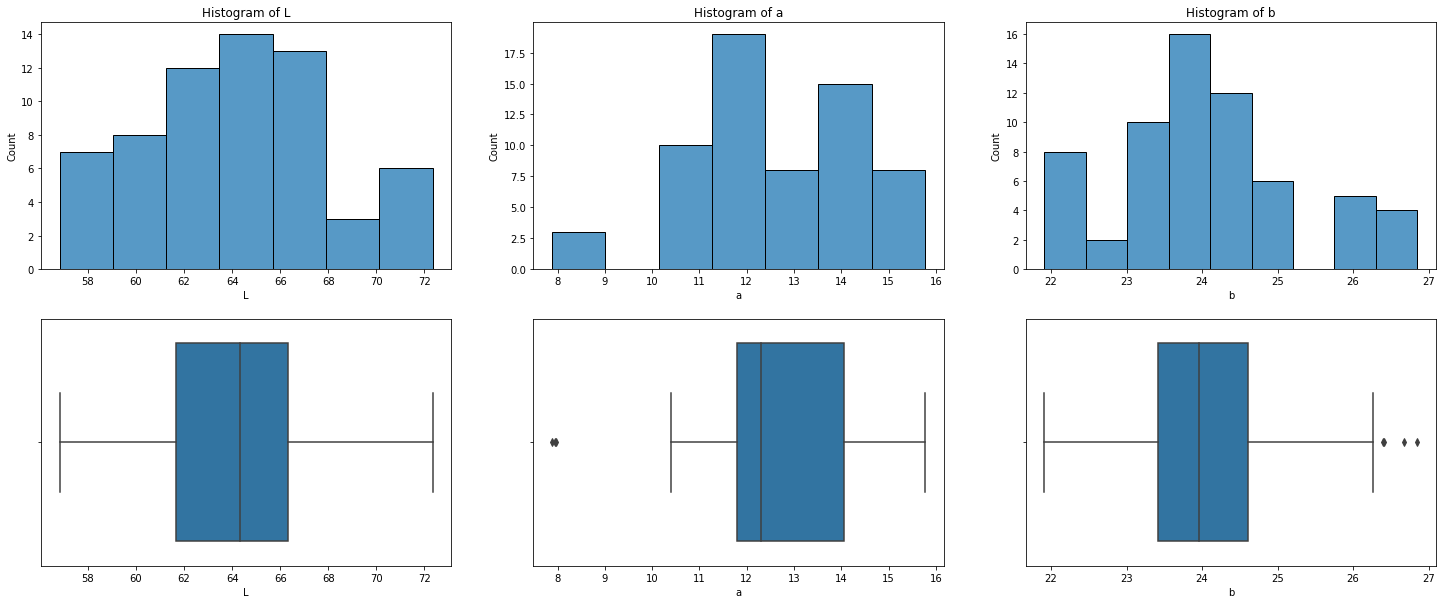

In [9]:
fig,ax=plt.subplots(ncols=3, nrows=2, figsize=[25,10])
sns.histplot(df, x='L',ax=ax[0,0])
ax[0,0]. set_title('Histogram of L')
sns.histplot(df, x='a',ax=ax[0,1])
ax[0,1]. set_title('Histogram of a')
sns.histplot(df, x='b',ax=ax[0,2])
ax[0,2]. set_title('Histogram of b')
sns.boxplot(data=df, x='L', ax=ax[1,0])
sns.boxplot(data=df, x='a', ax=ax[1,1])
sns.boxplot(data=df, x='b', ax=ax[1,2]);

### OBSERVATIONS

- L vaues were in the region of more white than dark but however decreased sharply at the tail end of the recorded range

- a values indicated that the samples were slightly more red than green. range was affected by some outliers representing the minimum. Without that, the a would have had a relatively smaller range.

-  recorded values for b showed samples were significantly more yellow than blue. b was also affected by outliers causing a larger maximum than the data would admit. b would have an even smaller range IN the outliers are ignored.


## Plots of Statistical Summary for SI and WAC

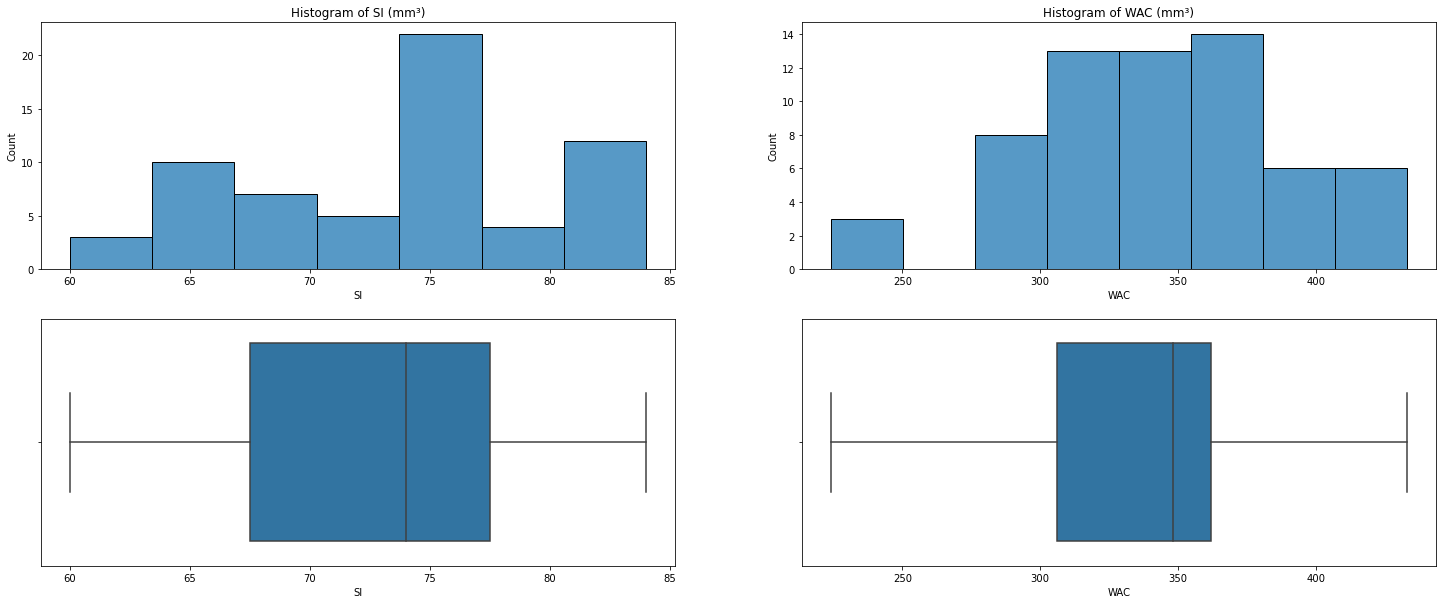

In [10]:
fig,ax=plt.subplots(ncols=2, nrows=2, figsize=[25,10])
sns.histplot(data=df, x='SI', ax=ax[0,0])
ax[0,0]. set_title('Histogram of SI (mm\u00b3)')
sns.histplot(data=df, x='WAC', ax=ax[0,1])
ax[0,1]. set_title('Histogram of WAC (mm\u00b3)')
sns.boxplot(data=df, x='SI', ax=ax[1,0])
sns.boxplot(data=df, x='WAC', ax=ax[1,1]);

### OBSERVATIONS

- SI values were low across the range of values except for a very high peak around 0.75mm<sup>3</sup> representing a high concentration of values in that region

- WAC had a distribution slightly similar to a uniform distribution with its mean close to the 50th percentile.

## Relationsip between recorded features (Correlation)

In this section we would like to study which features have a direct relationship and might be affected by the change of it relational variable. We use Python's seaborn  to summarize this relationship by outputing the R<sup>2</sup> values.

R<sup>2</sup> values  range from -1 (inversely correlated) through to 0 (no correlation) to a maximum of 1 (positively correlated)

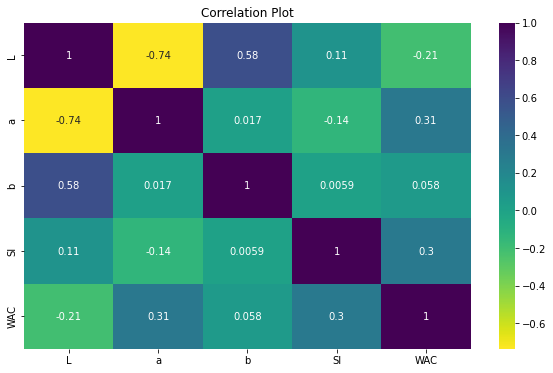

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='viridis_r',annot=True)
plt.title('Correlation Plot');

### OBSERVATIONS

- The most obvious and significantly highest correlation is a negative one between **L** and **a** values. This means the more a sample is described at light, there's a 74% chance it is in the green region and vice versa.

- **b** and **a** showed the next highest correlation positvely at 58%

- The most uncorrelated features was between **SI** and **b**

# Bivariate analysis

> In this section we study the  analysis of  Treatment Time on the recorded values for color, SI and WAC. This would help us determine the empirical relationship between them 

## PRE-TREATMENT TIME

In [12]:
##### Query the dataframe to group features by Treatment Time and display first 3 rows
df_0m = df.query('Time == "0min"')
df_1m = df.query('Time == "1min"')
df_2m = df.query('Time == "2min"')
df_3m = df.query('Time == "3min"')

print("1min",df_1m.head(3)), print("2min", df_2m.head(3)), print("3min", df_3m.head(3));

1min   Temperature  Treatment  Time      L      a      b  SI    WAC
3          50  hot water  1min  64.43  12.50  24.00  65  311.0
4          50  hot water  1min  64.29  12.21  23.87  65  309.0
5          50  hot water  1min  63.82  12.46  23.64  64  311.0
2min   Temperature  Treatment  Time      L      a      b  SI    WAC
6          50  hot water  2min  60.55  14.23  23.05  67  297.0
7          50  hot water  2min  60.39  14.23  22.97  68  299.0
8          50  hot water  2min  60.38  14.06  23.03  66  299.0
3min    Temperature  Treatment  Time      L      a      b  SI    WAC
9           50  hot water  3min  63.05  13.84  23.87  66  351.0
10          50  hot water  3min  63.39  13.57  23.91  66  348.0
11          50  hot water  3min  63.00  13.68  23.80  65  354.0


### Multiple Analysis of Variance (MANOVA)

MANOVA is a procedure for comparing multivariate sample means. As a multivariate procedure, it is used when there are two or more dependent variables, and is often followed by significance tests involving individual variables separately.

Let   be the means of pre-treatment times i.e., 0min, 1min, 2min adn 3min respectively
We would test the null hypothesis 

> **H<sub>0</sub>**: Pre-treatment times have equal means across quality indices

Against the alternative hypothesis

> **H<sub>1</sub>**: Pre-treatment times have different means across quality indices

With a significance level of **0.05**

In [13]:
maov = MANOVA.from_formula('L + a + b + SI + WAC ~Time', data=df)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0040 5.0000 55.0000 2755.9237 0.0000
         Pillai's trace   0.9960 5.0000 55.0000 2755.9237 0.0000
 Hotelling-Lawley trace 250.5385 5.0000 55.0000 2755.9237 0.0000
    Roy's greatest root 250.5385 5.0000 55.0000 2755.9237 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Time          Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.3822 15.0000 152.2322  4.2304 0.0000
           Pillai's trace 0.7251 15.0000 171.

### OBSERVATIONS

- All tests for MANOVA on the different pre-treatment times show that the p-value is less than the significance level (0.05) hence, we reject the null hypothesis.


We then investigate which of the quality indices would have statistically different means

## Effect of Treatment Time on Colour

In [14]:
def color_effect(df,text):
    fig, ax = plt.subplots(ncols = 3,nrows=2, figsize=[20,10])

    sns.boxplot(data=df, x='L', ax=ax[0,0])
    ax[0,0].set_title('Effect of '+ text + ' on L')
    sns.boxplot(data=df, x='a', ax=ax[0,1])
    ax[0,1].set_title('Effect of '+ text + ' on a')
    sns.boxplot(data=df, x='b', ax=ax[0,2])
    ax[0,2].set_title('Effect of '+ text + ' on b')
    sns.histplot(data=df, x='L', ax=ax[1,0])
    sns.histplot(data=df, x='a', ax=ax[1,1])
    sns.histplot(data=df, x='b', ax=ax[1,2]);

## 0 minutes

## Descriptive Statistics

In [15]:
df_0m[['L','a','b']].describe()

,L,a,b
count,9.000000,9.000000,9.000000
mean,64.144444,12.864444,24.978889
std,2.062863,1.403986,1.067104
min,61.640000,11.700000,23.960000
25%,61.710000,11.940000,24.090000
50%,64.390000,12.050000,24.490000
75%,66.030000,14.590000,26.260000
max,66.960000,14.860000,26.410000


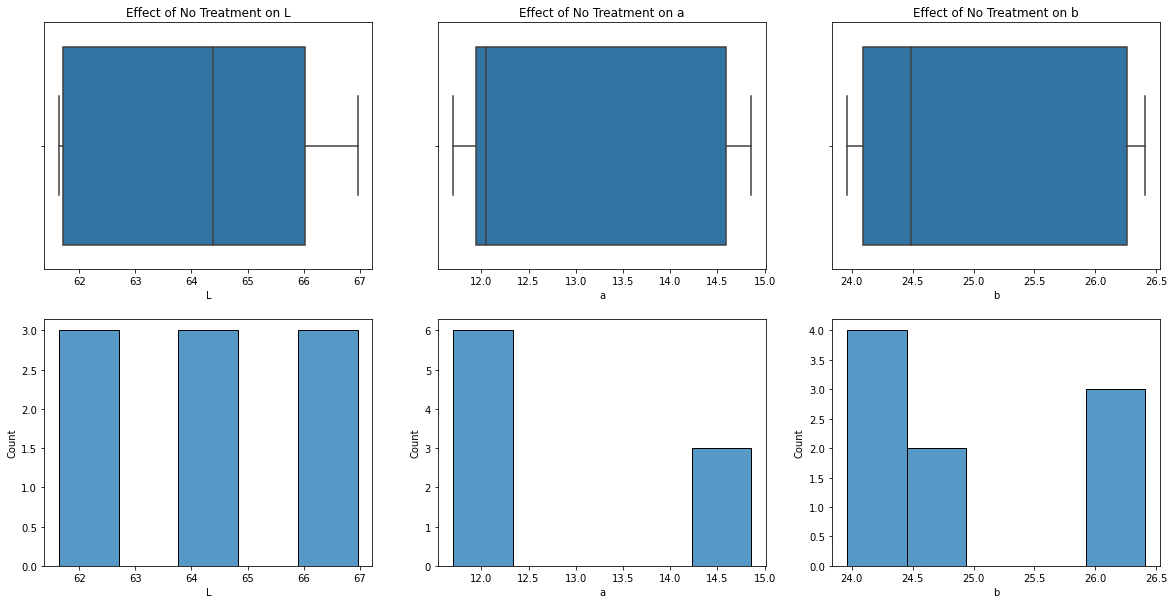

In [16]:
color_effect(df_0m, 'No Treatment')

### OBSERVATIONS

- L values ranged from between 61.64 and 66.96 indicating a significantly higher light to darkness ratio.

- a values ranged between 11.7 and 14.86 indicating a slightly higher red to green ratio.

- recorded values for b ranged between 23.96 and 26.41 indicating a significantly higher yellow to blue ratio
 

## 1 minute

### Descriptive Statistics

In [17]:
df_1m[['L','a','b']].describe()

,L,a,b
count,18.000000,18.000000,18.000000
mean,64.124444,13.143333,24.452778
std,4.286934,1.422847,1.089780
min,56.820000,10.700000,23.260000
25%,62.955000,12.215000,23.680000
50%,64.055000,12.480000,24.150000
75%,65.367500,14.197500,24.817500
max,71.490000,15.500000,26.850000


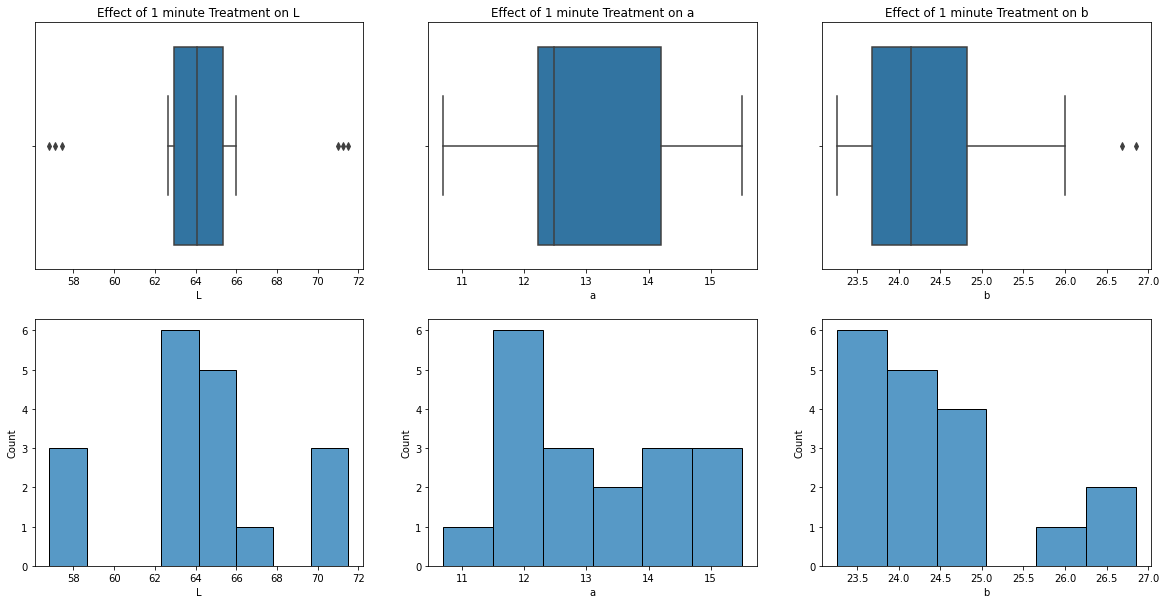

In [18]:
color_effect(df_1m, '1 minute Treatment')

### OBSERVATIONS

- a and b mean values were significantly higher than the means of total dataset with the same properties. Mean of L recorded under 1min treatment were marginally lower than the means of the original data.

## 2 minutes

### Descriptive Statistics

In [19]:
df_2m[['L','a','b']].describe()

,L,a,b
count,18.000000,18.000000,18.000000
mean,63.906111,12.632222,23.819444
std,4.603987,1.826574,1.258447
min,58.770000,10.390000,21.910000
25%,60.382500,10.817500,23.035000
50%,62.890000,12.495000,23.575000
75%,66.070000,14.187500,24.552500
max,72.340000,15.770000,26.130000


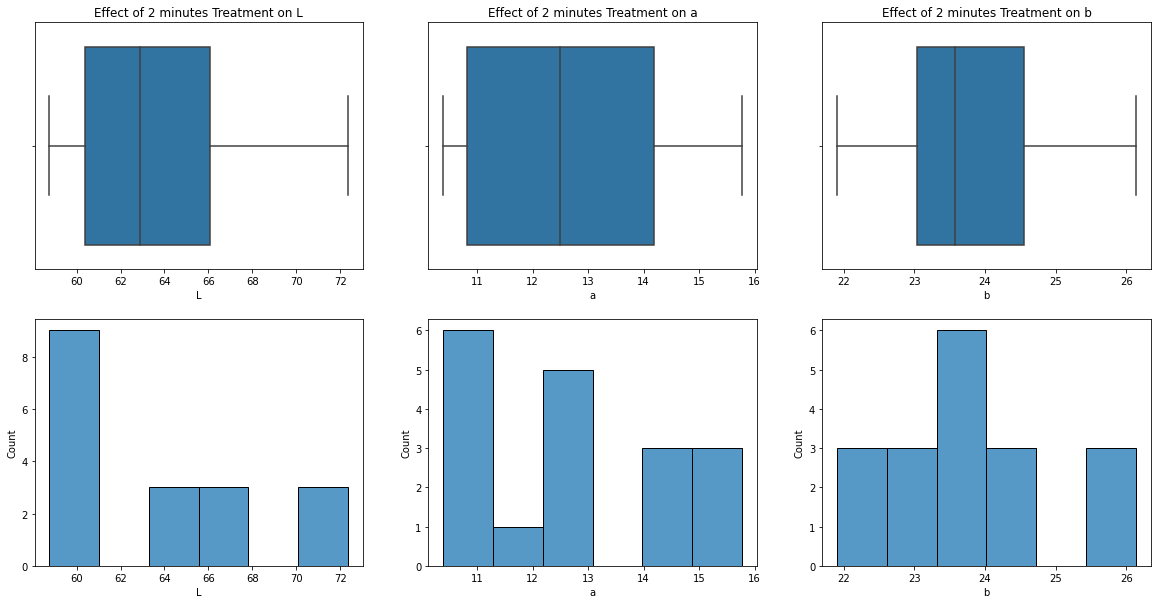

In [20]:
color_effect(df_2m, '2 minutes Treatment')

### OBSERVATIONS

- Apart from L which recorded lower values, samples treated for 2min recorded lower means than the total dataset.

## 3 minutes

### Descriptive Statistics

In [21]:
df_3m[['L','a','b']].describe()

,L,a,b
count,18.000000,18.000000,18.000000
mean,64.442778,11.908333,23.480000
std,3.380866,2.169669,0.993763
min,58.140000,7.880000,21.970000
25%,63.052500,10.880000,22.407500
50%,64.930000,12.370000,23.720000
75%,66.837500,13.652500,24.330000
max,68.710000,14.170000,24.690000


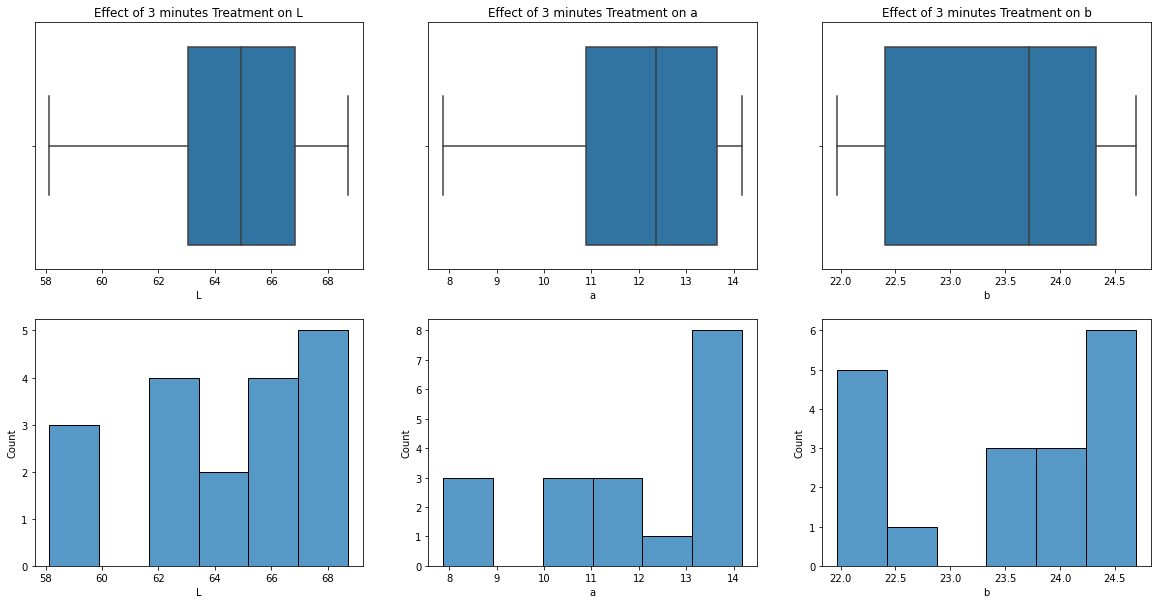

In [22]:
color_effect(df_3m,'3 minutes Treatment')

### OBSERVATIONS

- a values recorded at 3min pre-treatment produced lower means than the other properties when compared to the total dataset.

## Analysis of Variance (ANOVA) for Color properties

We would test the null hypothesis 

> **H<sub>0</sub>**: Pre-treatment times have equal means across different color indices

Against the alternative hypothesis

> **H<sub>1</sub>**: Pre-treatment times have different means across different color indices

With a significance level of **0.05**

In [23]:
reg = ols('L~Time', data=df).fit()
aov = sm.stats.anova_lm(reg, type=2)
print('### Analysis for L')
print(aov)

reg = ols('a~Time', data=df).fit()
aov = sm.stats.anova_lm(reg, type=2)
print('### Analysis for a')
print(aov)


reg = ols('b~Time', data=df).fit()
aov = sm.stats.anova_lm(reg, type=2)
print('### Analysis for b')
print(aov)

### Analysis for L
            df      sum_sq    mean_sq         F    PR(>F)
Time       3.0    2.623471   0.874490  0.057256  0.981831
Residual  59.0  901.124056  15.273289       NaN       NaN
### Analysis for a
            df      sum_sq   mean_sq        F    PR(>F)
Time       3.0   14.571782  4.857261  1.53307  0.215362
Residual  59.0  186.930983  3.168322      NaN       NaN
### Analysis for b
            df     sum_sq   mean_sq         F    PR(>F)
Time       3.0  17.467798  5.822599  4.705257  0.005184
Residual  59.0  73.010544  1.237467       NaN       NaN


### Observations

- Among the three color properties, only **b** had a p-value of 0.005 which is significantly lower than the significance level (0.05) therefore we reject the null hypothesis that pre-treatment times have equal means for **b**.


### Post-hoc testing

However, ANOVA only tells us if there are differences among the levels of the independent variable, but not which differences are significant. To find how the treatment levels differ from one another, we perform a TukeyHSD (Tukey’s Honestly-Significant Difference) post-hoc test

In [24]:
mc = pairwise_tukeyhsd(df['b'], df['Time'], alpha=0.025)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.03 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0min   1min  -0.5261 0.6551 -1.8511  0.7989  False
  0min   2min  -1.1594 0.0621 -2.4845  0.1656  False
  0min   3min  -1.4989 0.0087 -2.8239 -0.1739   True
  1min   2min  -0.6333 0.3288 -1.7152  0.4485  False
  1min   3min  -0.9728 0.0525 -2.0546  0.1091  False
  2min   3min  -0.3394 0.7967 -1.4213  0.7424  False
----------------------------------------------------


### OBSERVATIONS

- It is observed that our rejection of the null hypothesis for **b** stems from the relationship between 0min and 3min with an adujsted p-value of 0.008, which is less than our level of significance.


## Effect of Treatment Time on SI and WAC

In [25]:
def si_wac(df,text):

    fig, ax = plt.subplots(ncols = 2,nrows= 2, figsize=[22,10])

    sns.boxplot(data=df, x='SI', ax=ax[0,0])
    ax[0,0].set_title('SI at '+ text)
    ax[0,0].set_xlabel("SI(%)")
    sns.boxplot(data=df, x='WAC', ax=ax[0,1])
    ax[0,1].set_title('WAC at '+ text)
    ax[0,1].set_xlabel("WAC(%)")
    

    sns.histplot(data=df, x='SI', ax=ax[1,0])
    ax[1,0].set_xlabel("SI(%)")
    sns.histplot(data=df, x='WAC', ax=ax[1,1])
    ax[1,1].set_xlabel("WAC(%)");

## 0 Minutes

In [26]:
df_0m[['SI','WAC']].describe()

,SI,WAC
count,9.000000,9.000000
mean,69.222222,322.333333
std,6.159906,19.931131
min,60.000000,303.000000
25%,62.000000,307.000000
50%,72.000000,314.000000
75%,74.000000,347.000000
max,76.000000,349.000000


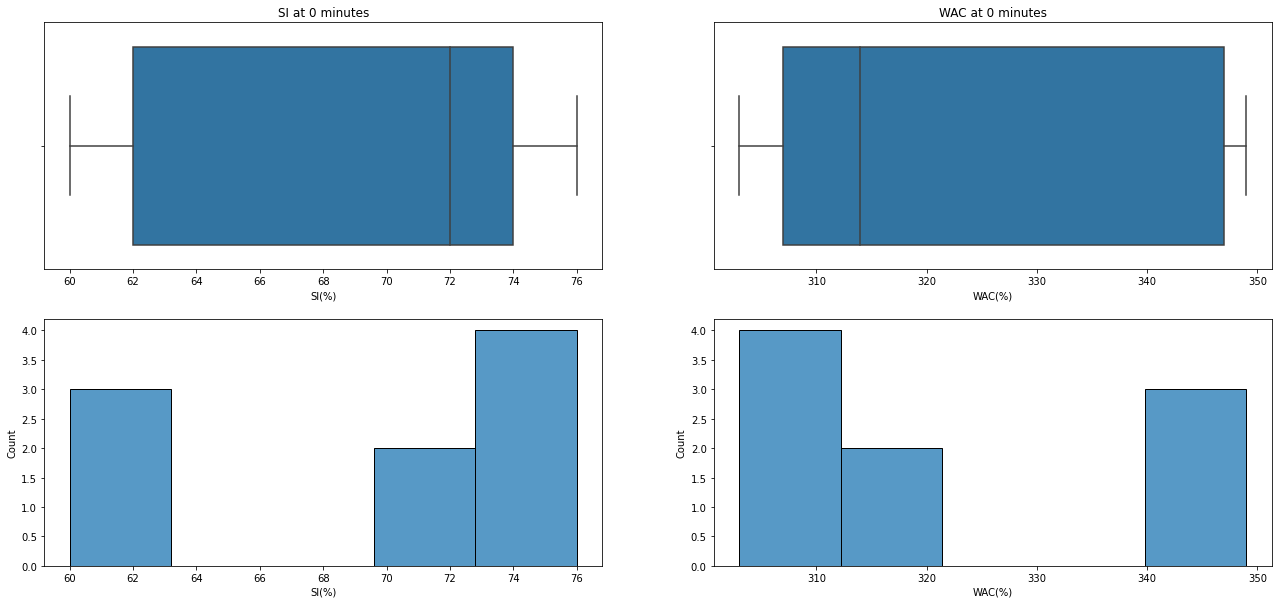

In [27]:
si_wac(df_0m,'0 minutes')

### OBSERVATIONS

- 


## 1 Minute

In [28]:
df_1m[['SI','WAC']].describe()

,SI,WAC
count,18.000000,18.000000
mean,71.944444,360.000000
std,5.034846,37.682887
min,64.000000,309.000000
25%,66.500000,339.250000
50%,73.500000,359.000000
75%,76.750000,361.750000
max,78.000000,433.000000


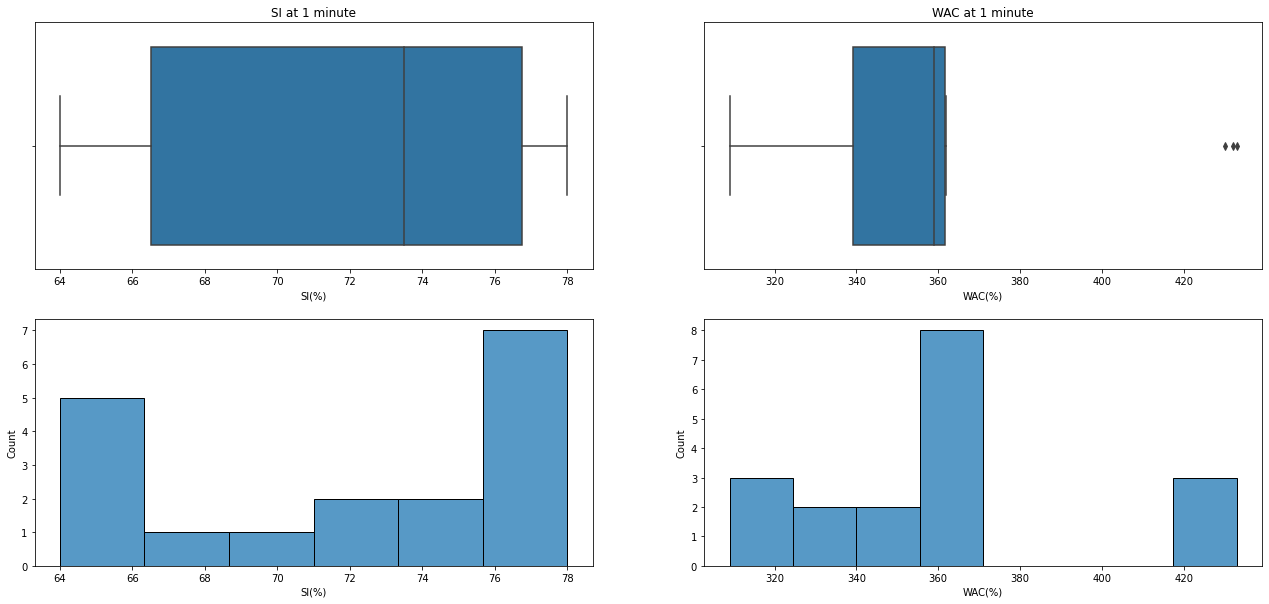

In [29]:
si_wac(df_1m, '1 minute')

### OBSERVATIONS

- Mean values of SI were significantly higher than the means of total dataset with the same properties.

- Means for WAC recorded under 1min treatment were marginally lower than the means of the original data.
 
 

## 2 Minutes

In [30]:
df_0m[['SI','WAC']].describe()

,SI,WAC
count,9.000000,9.000000
mean,69.222222,322.333333
std,6.159906,19.931131
min,60.000000,303.000000
25%,62.000000,307.000000
50%,72.000000,314.000000
75%,74.000000,347.000000
max,76.000000,349.000000


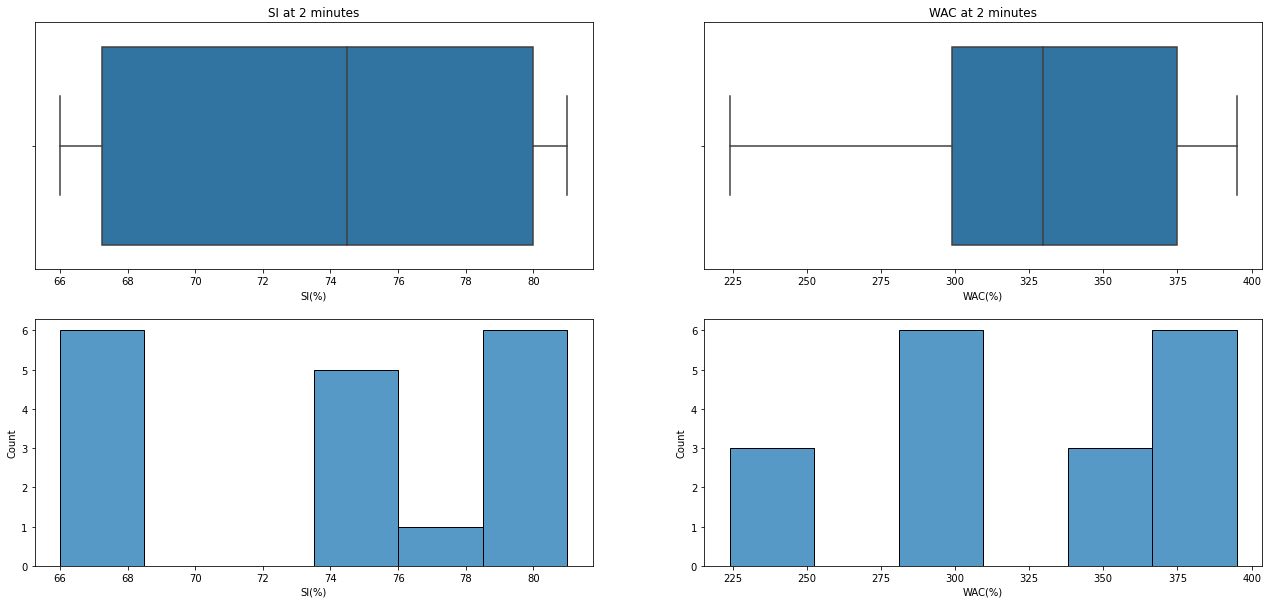

In [31]:
si_wac(df_2m, '2 minutes')

### OBSERVATIONS

- Samples treated for 2min recorded lower means than the total dataset.


## 3 Minutes

In [32]:
df_0m[['SI','WAC']].describe()

,SI,WAC
count,9.000000,9.000000
mean,69.222222,322.333333
std,6.159906,19.931131
min,60.000000,303.000000
25%,62.000000,307.000000
50%,72.000000,314.000000
75%,74.000000,347.000000
max,76.000000,349.000000


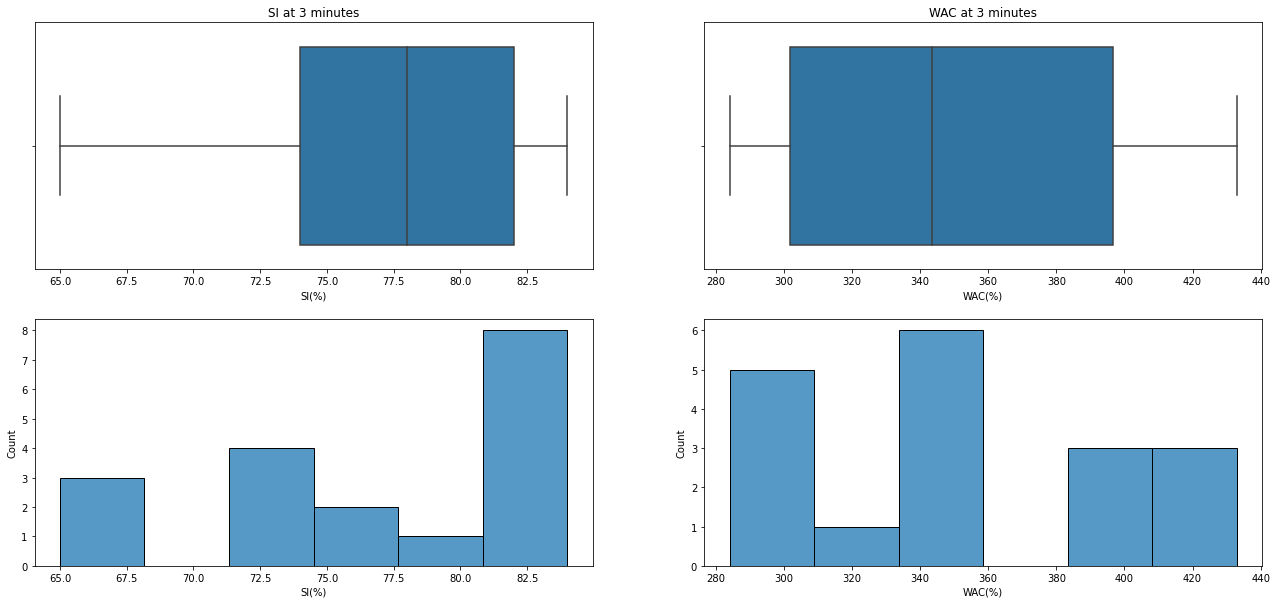

In [33]:
si_wac(df_3m, '3 minutes')

### OBSERVATIONS

- WAC values recorded at 3min pre-treatment produced lower means than the SI when compared to the total dataset.



### ANOVA For SI and WAC

We would test the null hypothesis 

> **H<sub>0</sub>**: Pre-treatment times have equal means across SI and WAC indices

Against the alternative hypothesis

> **H<sub>1</sub>**: Pre-treatment times have different means across SI and WAC indices

With a significance level of **0.05**

In [34]:
reg = ols('SI~Time', data=df).fit()
aov = sm.stats.anova_lm(reg, type=2)
print('### Analysis for SI')
print(aov)


reg = ols('WAC~Time', data=df).fit()
aov = sm.stats.anova_lm(reg, type=2)
print('Analysis for WAC')
print(aov)

### Analysis for SI
            df       sum_sq     mean_sq         F    PR(>F)
Time       3.0   413.611111  137.870370  4.051084  0.010982
Residual  59.0  2007.944444   34.032957       NaN       NaN
Analysis for WAC
            df         sum_sq      mean_sq         F    PR(>F)
Time       3.0   15498.706349  5166.235450  2.279308  0.088729
Residual  59.0  133728.277778  2266.580979       NaN       NaN


### OBSERVATIONS

- SI has a p-value of 0.01 which is less than the level of significance; 0.05, hence we reject the null hypothesis.

We then conduct a post-hoc test on SI to find out which time comparisons cause the rejection of the null hypothesis


In [35]:
mc = pairwise_tukeyhsd(df['SI'], df['Time'], alpha=0.025)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.03 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0min   1min   2.7222 0.6646 -4.2265  9.6709  False
  0min   2min   4.8333  0.189 -2.1154  11.782  False
  0min   3min   7.6111 0.0117  0.6624 14.5598   True
  1min   2min   2.1111 0.6996 -3.5625  7.7847  False
  1min   3min   4.8889  0.068 -0.7847 10.5625  False
  2min   3min   2.7778  0.487 -2.8958  8.4514  False
----------------------------------------------------


### OBSERVATIONS

- It can be seen that once again mean comparisons between 0min and 3min had the most significant difference causing us to reject the null hypothesis of SI.

## Correlation by Treatment Time

In [36]:
def corr_plot(df1,df2,df3,df4,txt1,txt2,txt3,txt4):
    fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize=[16,10])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

    sns.heatmap(df1.corr(), cmap='viridis_r',annot=True, ax=ax[0,0])
    ax[0,0].set_title('Correlation at ' +txt1)
    
    sns.heatmap(df2.corr(), cmap='viridis_r',annot=True, ax=ax[0,1])
    ax[0,1].set_title('Correlation at ' +txt2)

    sns.heatmap(df3.corr(), cmap='viridis_r',annot=True, ax=ax[1,0])
    ax[1,0].set_title('Correlation at ' +txt3)

    sns.heatmap(df4.corr(), cmap='viridis_r',annot=True, ax=ax[1,1])
    ax[1,1].set_title('Correlation at ' +txt4);

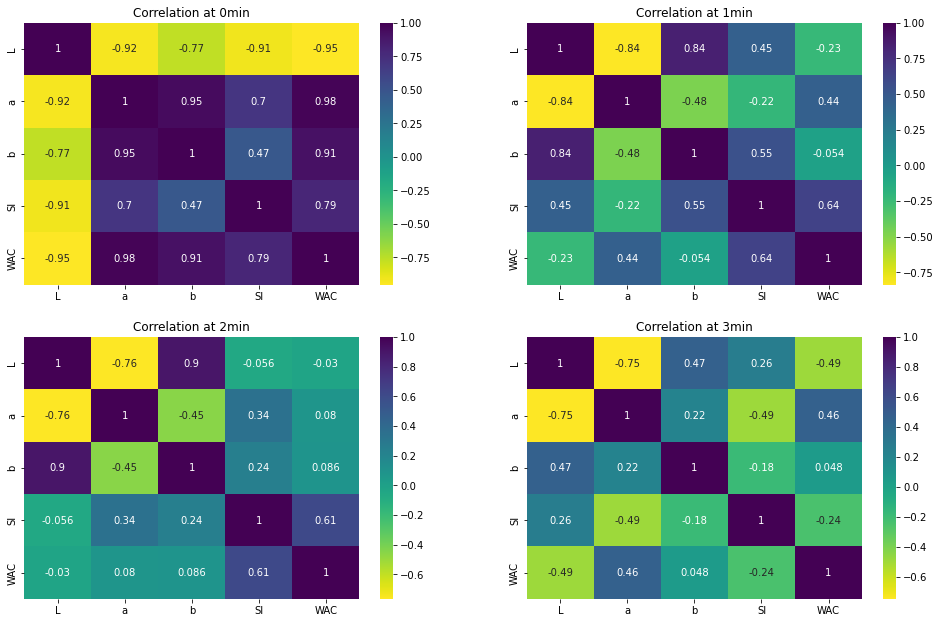

In [37]:
corr_plot(df_0m,df_1m,df_2m,df_3m,'0min','1min','2min','3min')

### OBSERVATIONS 

- The highest correlations by treatment time at 1min was discovered between L and a (negative) and L and b (positive).

- The highest correlations by treatment time at 2min was also between L and a (negative) and L and b (positive).

## Pair-wise Plot

In [38]:
def pw_plot(df1,feature):
    g = sns.PairGrid(df, hue=feature)
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot)
    g.add_legend();

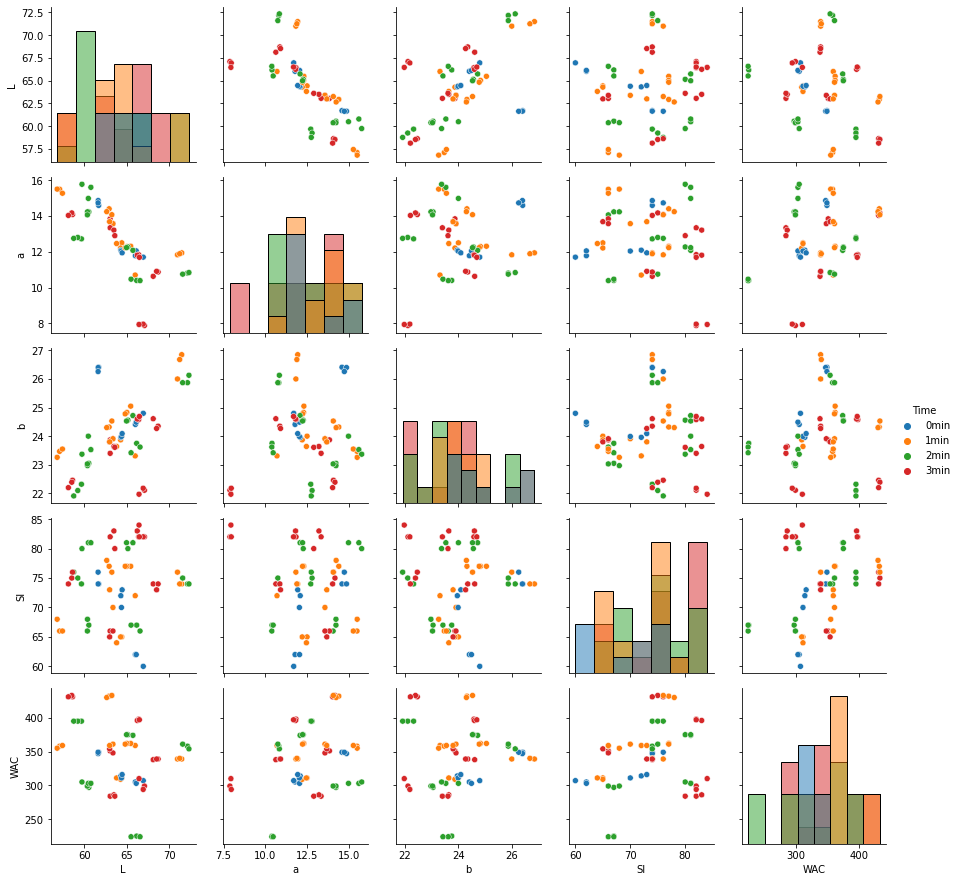

In [39]:
pw_plot(df,"Time")

### OBSERVATIONS

Relationships to note

- L and a

- L and b

# MULTIVARIATE ANALYSIS

## TEMPERATURE AND TREATMENT TIME

## Effect on Color

In [40]:
def multi_color(hue):
    fig, ax = plt.subplots(ncols = 3, figsize=[18,6])

    sns.stripplot(hue=hue, y="L", x='Time', data=df, ax=ax[0])
    ax[0].set_title('Effect of '+ hue+' and Treatment Time on L')
    ax[0].axhline(y=df["L"].mean())

    sns.stripplot(hue=hue, y="a", x='Time', data=df, ax=ax[1])
    ax[1].set_title('Effect of '+ hue+' and Treatment Time on a')
    ax[1].axhline(y=df["a"].mean())

    sns.stripplot(hue=hue, y="b", x='Time', data=df, ax=ax[2])
    ax[2].set_title('Effect of '+ hue+' and Treatment Time on b')
    ax[2].axhline(y=df["b"].mean());

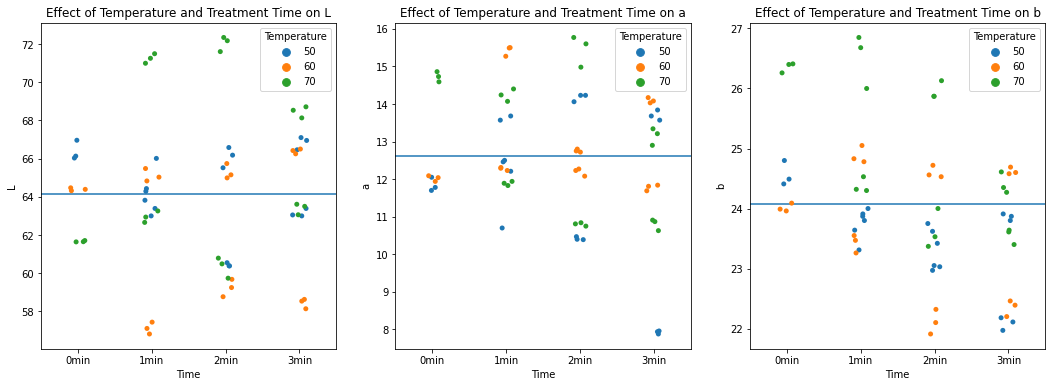

In [41]:
multi_color("Temperature")

### OBSERVATIONS

- 

## Effect on SI and WAC

In [42]:
def multi_siwac(hue):
    fig, ax = plt.subplots(ncols = 2, figsize=[18,6])

    sns.stripplot(hue="Temperature", y="SI", x="Time", data=df, ax=ax[0])
    ax[0].axhline(y=df["SI"].mean())
    ax[0].set_ylabel('SI(%)')
    ax[0].set_title('Effect of Pre-treatment Time and Temperature on SI')

    sns.stripplot(hue="Temperature", y="WAC", x="Time", data=df, ax=ax[1], linestyle="--")
    ax[1].axhline(y=df["WAC"].mean())
    ax[1].set_ylabel('WAC(%)')
    ax[1].set_title('Effect of Pre-treatment Time and Temperature on WAC')
    ;

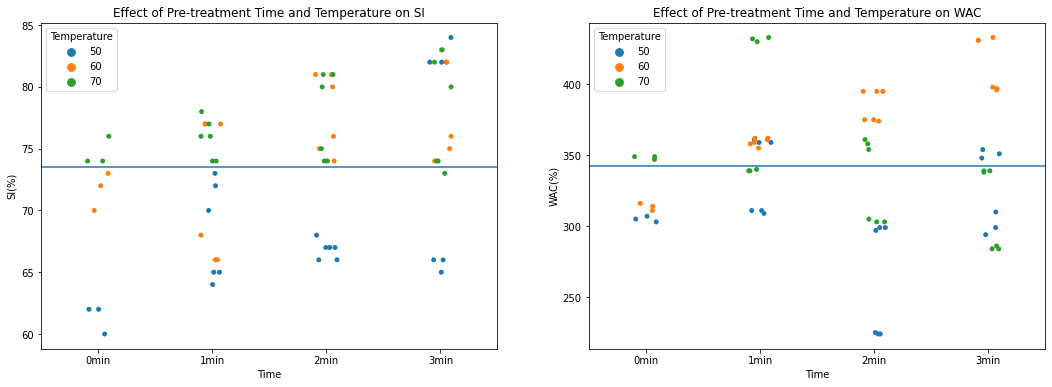

In [43]:
multi_siwac("Temperature")

# TREATMENT AND TREATMENT TIME

## Effect on Color

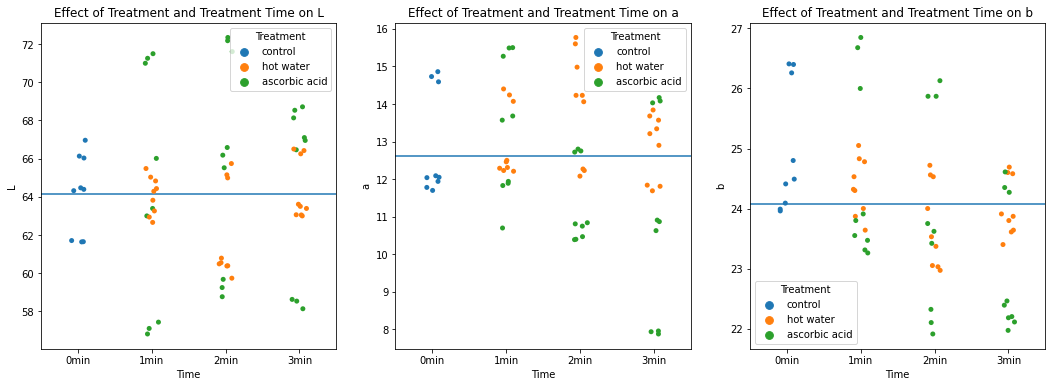

In [44]:
multi_color("Treatment")

### OBSERVATIONS

## Effect on SI and WAC

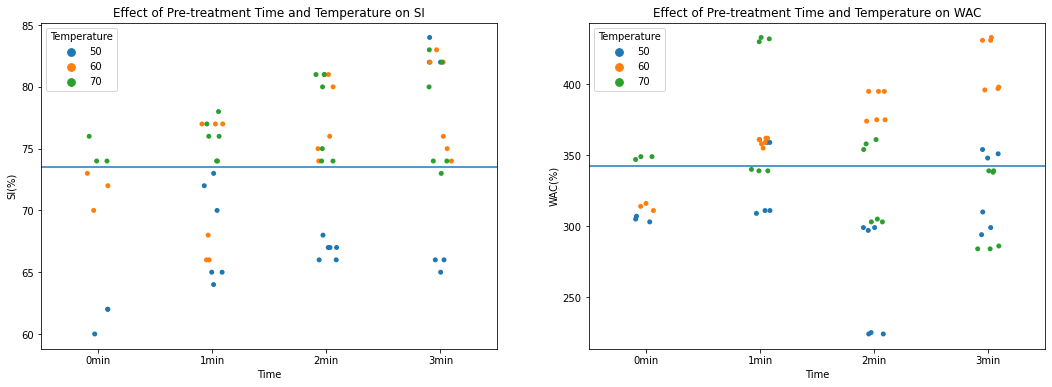

In [45]:
multi_siwac("Treatment")

# Effect of Temperature, Treatment and Treatment Time

In [46]:
def ttt_plot1(val):
    g = sns.FacetGrid(df, hue="Temperature", col="Treatment", height=4)
    g.map(sns.stripplot, "Time", val)
    g.axes[0,0].set_ylabel(val)
    g.add_legend()
    g.refline(y=df[val].mean())

    
def ttt_plot2(val):
    g = sns.FacetGrid(df, hue="Temperature", col="Treatment", height=4)
    g.map(sns.stripplot, "Time", val)
    g.axes[0,0].set_ylabel(val+"(%)")
    g.add_legend()
    g.refline(y=df[val].mean())

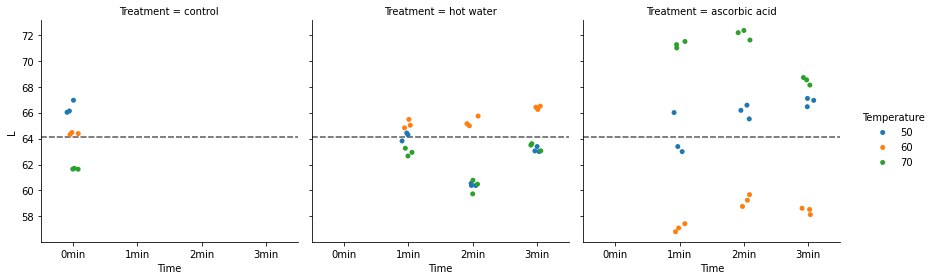

In [47]:
ttt_plot1("L")

## Effect on L

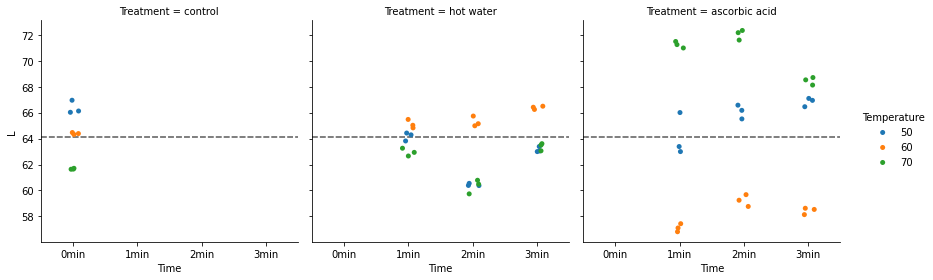

In [48]:
ttt_plot1("L")

## Effect on a

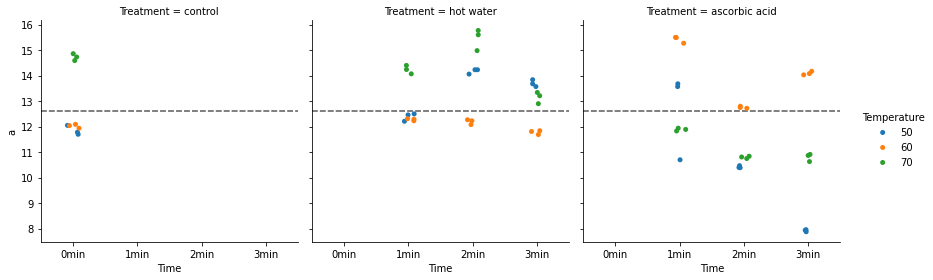

In [49]:
ttt_plot1("a")

## Effect on b

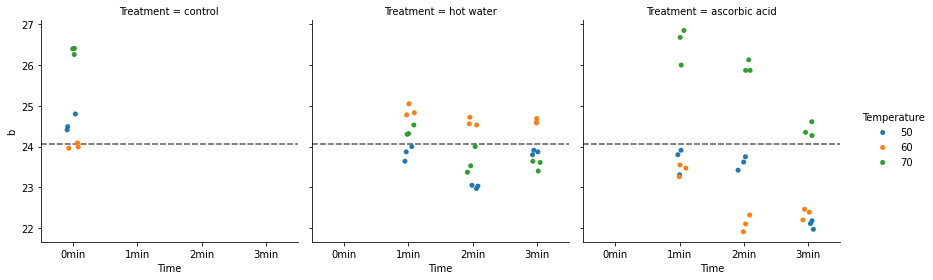

In [50]:
ttt_plot1("b")

## Effect on SI

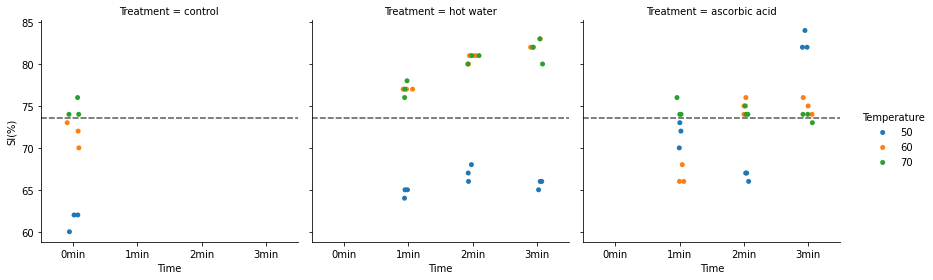

In [51]:
ttt_plot2("SI")

## Effect on WAC

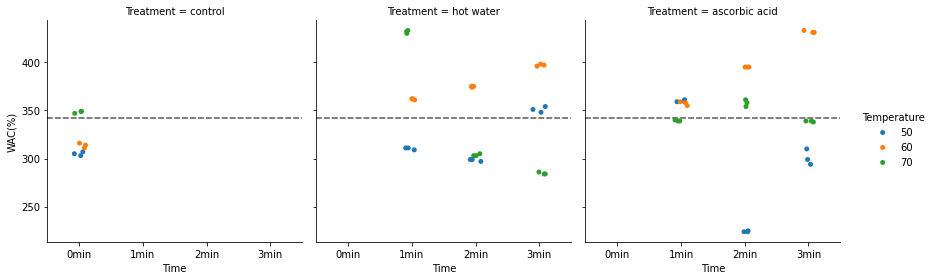

In [52]:
ttt_plot2("WAC")